In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv("baseball.csv")

In [20]:
df.head()

,Wins,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Bases,SrikeOuts,StolenBases,RunsAllowed,Earned Runs,Earned Runs Average,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [21]:
df.tail()

,Wins,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Bases,SrikeOuts,StolenBases,RunsAllowed,Earned Runs,Earned Runs Average,CG,Shutouts,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [22]:
df.describe()

,Wins,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Bases,SrikeOuts,StolenBases,RunsAllowed,Earned Runs,Earned Runs Average,CG,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [23]:
print(df.nunique())

Wins                   24
Runs                   28
AtBats                 29
Hits                   29
Doubles                22
Triples                23
HomeRuns               27
Bases                  29
SrikeOuts              29
StolenBases            27
RunsAllowed            30
Earned Runs            30
Earned Runs Average    30
CG                      9
Shutouts               12
Saves                  20
Errors                 21
dtype: int64


In [24]:
df.isnull().sum()

Wins                   0
Runs                   0
AtBats                 0
Hits                   0
Doubles                0
Triples                0
HomeRuns               0
Bases                  0
SrikeOuts              0
StolenBases            0
RunsAllowed            0
Earned Runs            0
Earned Runs Average    0
CG                     0
Shutouts               0
Saves                  0
Errors                 0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
Wins                   30 non-null int64
Runs                   30 non-null int64
AtBats                 30 non-null int64
Hits                   30 non-null int64
Doubles                30 non-null int64
Triples                30 non-null int64
HomeRuns               30 non-null int64
Bases                  30 non-null int64
SrikeOuts              30 non-null int64
StolenBases            30 non-null int64
RunsAllowed            30 non-null int64
Earned Runs            30 non-null int64
Earned Runs Average    30 non-null float64
CG                     30 non-null int64
Shutouts               30 non-null int64
Saves                  30 non-null int64
Errors                 30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [26]:
df.dtypes

Wins                     int64
Runs                     int64
AtBats                   int64
Hits                     int64
Doubles                  int64
Triples                  int64
HomeRuns                 int64
Bases                    int64
SrikeOuts                int64
StolenBases              int64
RunsAllowed              int64
Earned Runs              int64
Earned Runs Average    float64
CG                       int64
Shutouts                 int64
Saves                    int64
Errors                   int64
dtype: object

In [29]:
from scipy.stats import zscore
zscore=abs(zscore(df))
print(df.shape)
df_final=df.loc[(zscore<3).all(axis=1)]
print(df_final.shape)

(30, 17)
(29, 17)


In [30]:
df_final.corr()

,Wins,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Bases,SrikeOuts,StolenBases,RunsAllowed,Earned Runs,Earned Runs Average,CG,Shutouts,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
Runs,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AtBats,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
Hits,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
Doubles,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
Triples,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HomeRuns,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
Bases,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SrikeOuts,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
StolenBases,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


In [31]:
df_final.skew()

Wins                   0.119013
Runs                  -0.215364
AtBats                 0.169573
Hits                   0.783772
Doubles               -0.335304
Triples                0.090124
HomeRuns               0.450862
Bases                  0.151193
SrikeOuts             -0.233815
StolenBases            0.494966
RunsAllowed            0.018155
Earned Runs            0.018461
Earned Runs Average    0.016693
CG                     0.854980
Shutouts               0.526943
Saves                  0.627480
Errors                 0.840271
dtype: float64

In [32]:
for col in df_final.columns:
    if df_final.skew().loc[col]>0.55:
        df_final[col]=np.log1p(df_final[col])
df_final.skew()

Wins                   0.119013
Runs                  -0.215364
AtBats                 0.169573
Hits                   0.738455
Doubles               -0.335304
Triples                0.090124
HomeRuns               0.450862
Bases                  0.151193
SrikeOuts             -0.233815
StolenBases            0.494966
RunsAllowed            0.018155
Earned Runs            0.018461
Earned Runs Average    0.016693
CG                    -0.275681
Shutouts               0.526943
Saves                  0.109983
Errors                 0.586101
dtype: float64

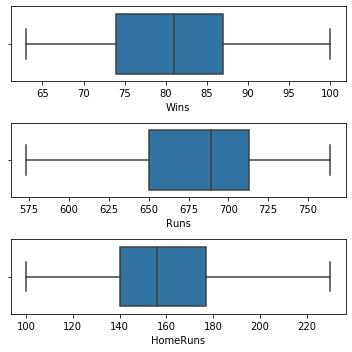

In [33]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df_final['Wins'], ax = axs[0])
plt2 = sns.boxplot(df_final['Runs'], ax = axs[1])
plt3 = sns.boxplot(df_final['HomeRuns'], ax = axs[2])
plt.tight_layout()

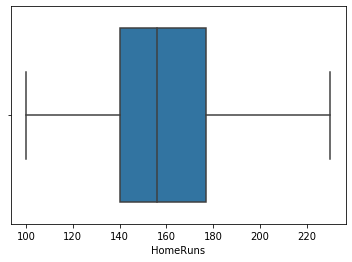

In [34]:
sns.boxplot(df_final['HomeRuns'])
plt.show()

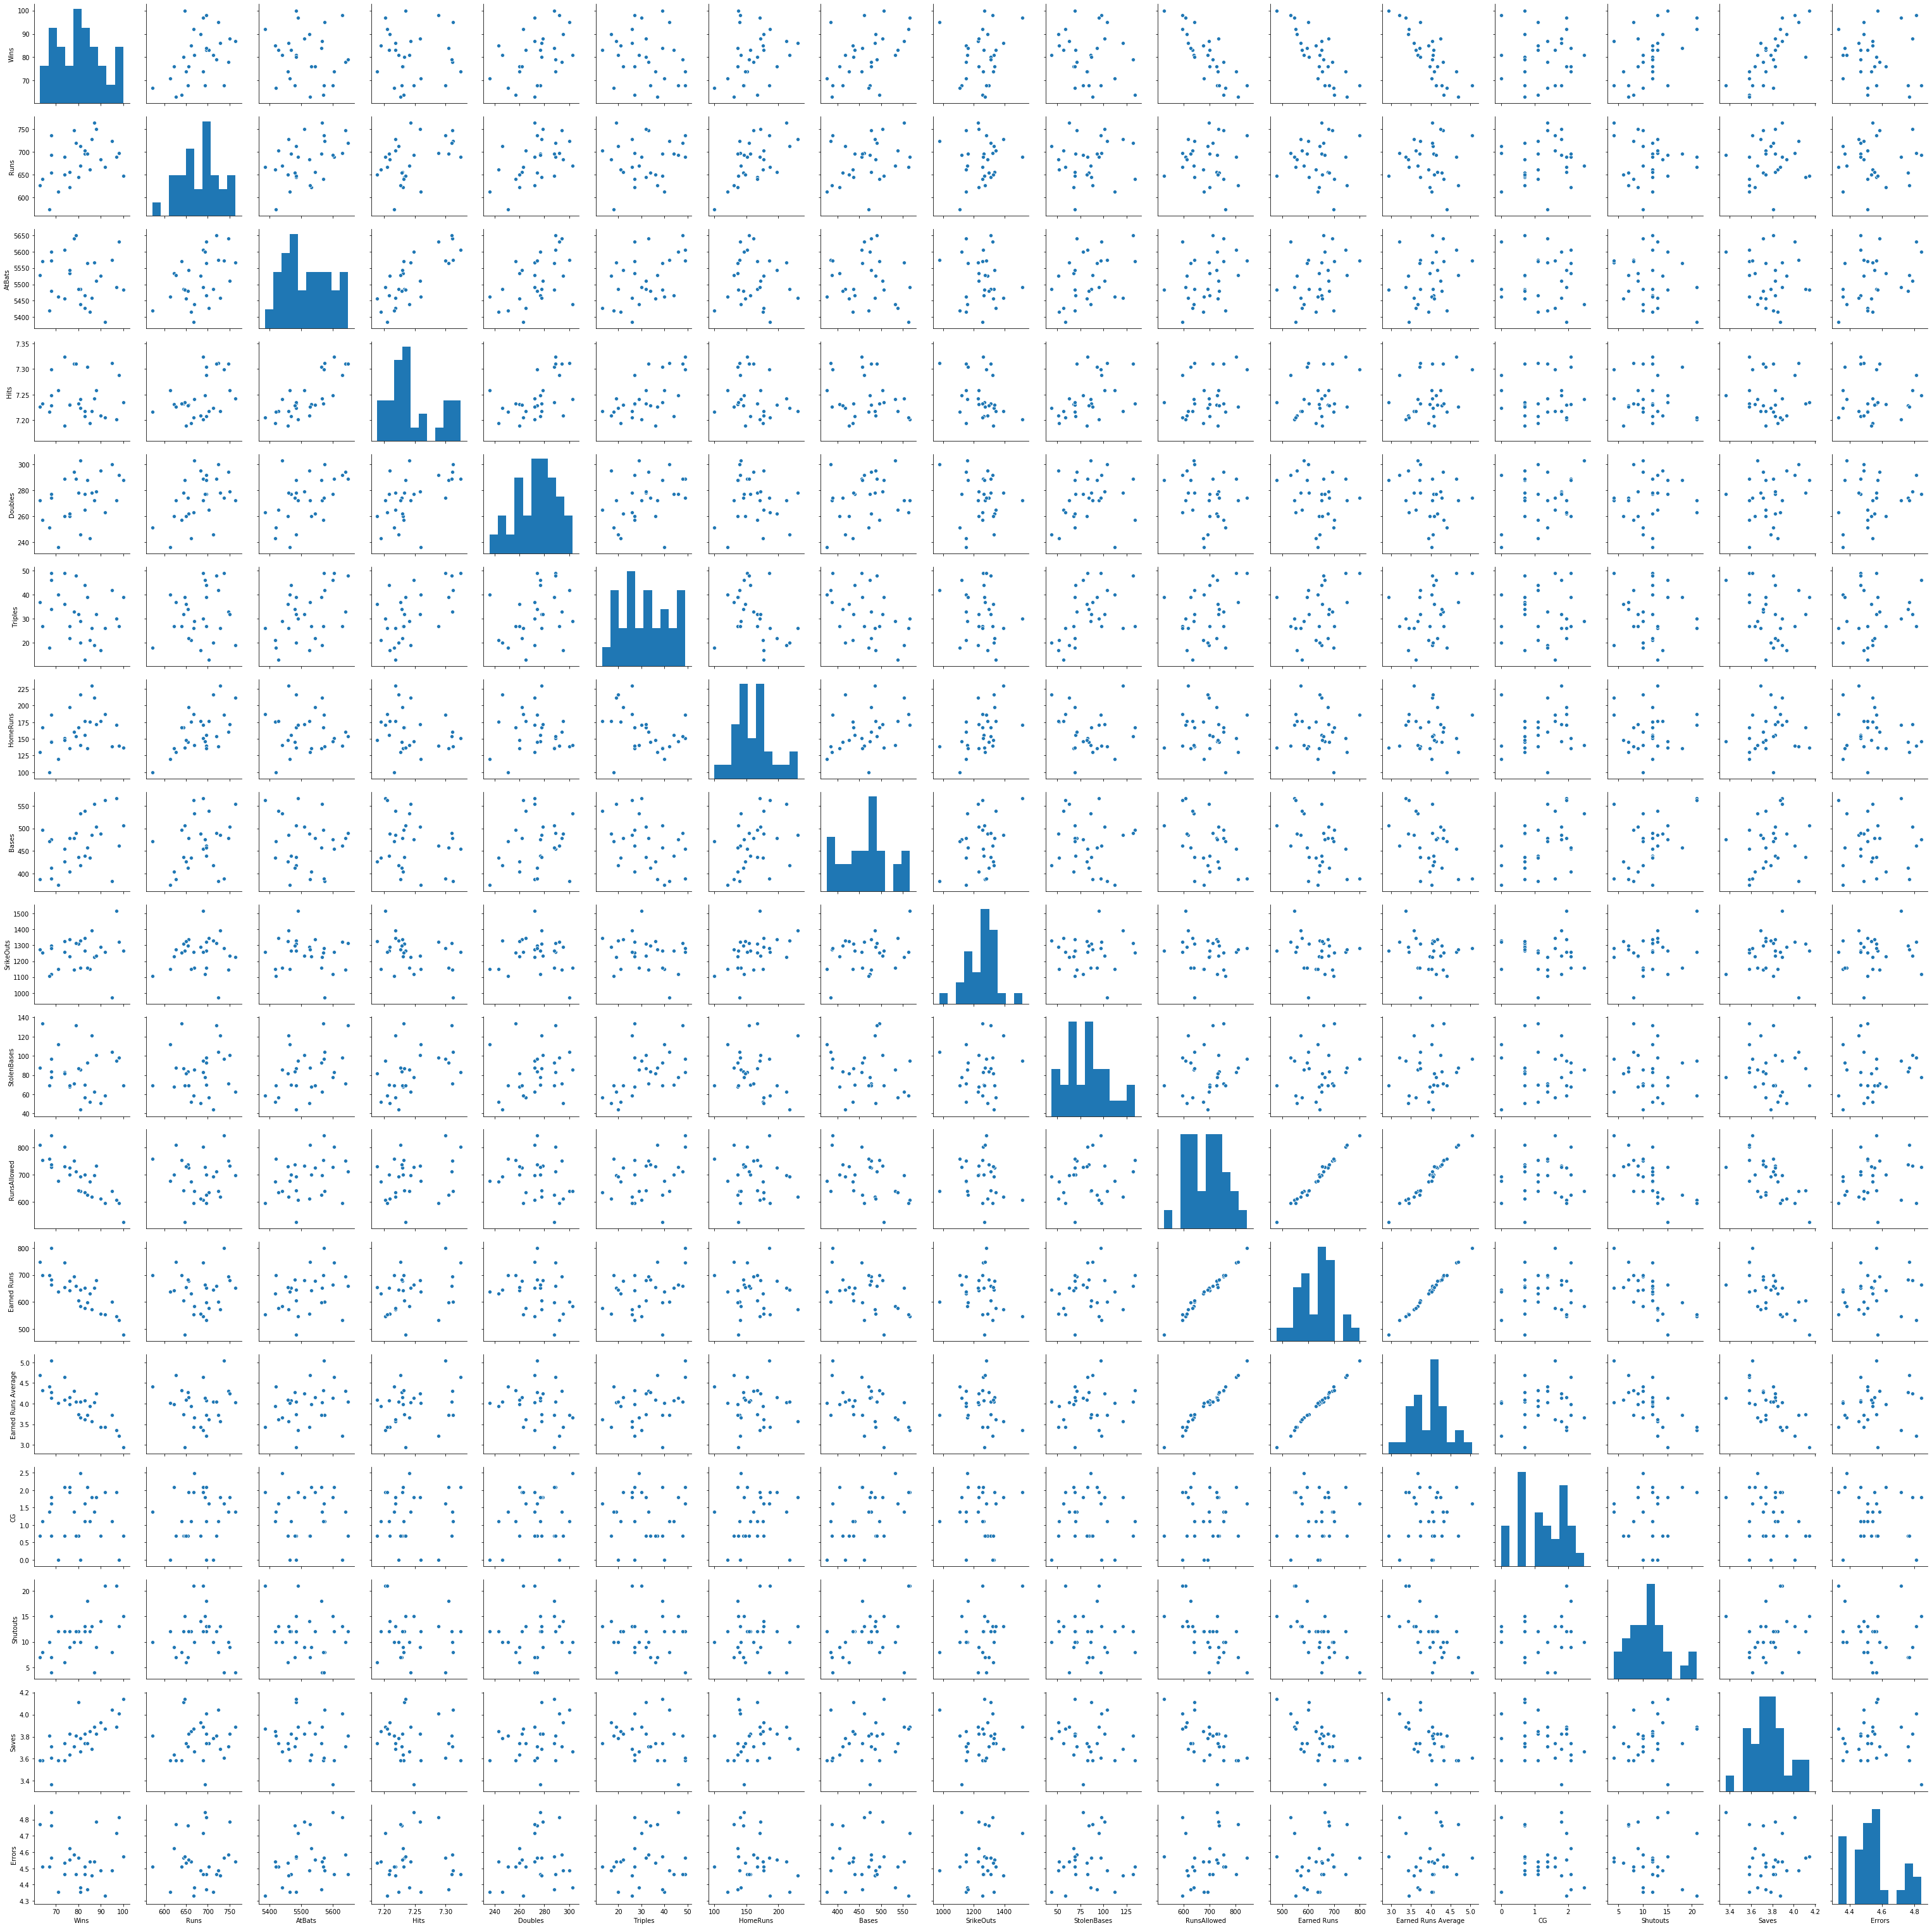

In [35]:
sns.pairplot(df_final)

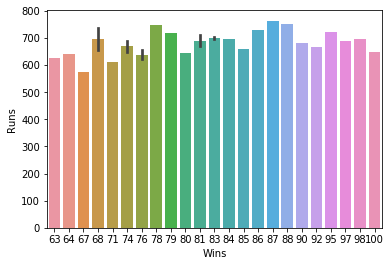

In [36]:
sns.barplot(x="Wins",y="Runs",data=df_final)
plt.show()

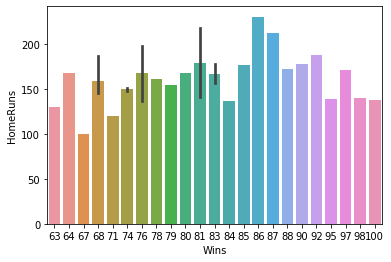

In [37]:
sns.barplot(x="Wins",y="HomeRuns",data=df_final)
plt.show()

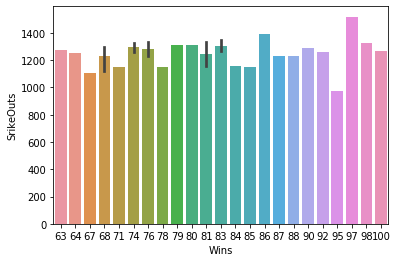

In [40]:
sns.barplot(x="Wins",y="SrikeOuts",data=df_final)
plt.show()

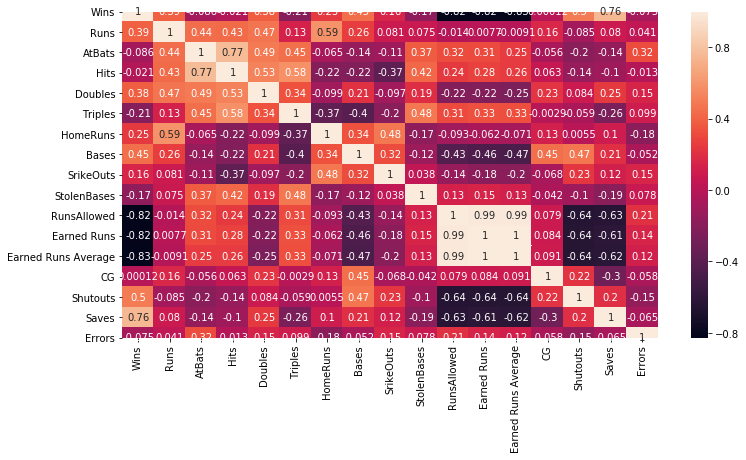

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(df_final.corr(),annot=True)

In [42]:
x=df_final.drop(columns=["Wins"])
y=df_final[["Wins"]]

In [43]:
 x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 55,test_size=0.20)

In [44]:
x_train.shape

(23, 16)

In [45]:
x_test.shape

(6, 16)

In [46]:
y_train.shape

(23, 1)

In [47]:
y_test.shape

(6, 1)

In [59]:
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(60,100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is: ",max_r_score)

max r2 score corresponding to  73  is:  0.8507709590470934


In [60]:
from sklearn.model_selection  import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y, cv=5,scoring="r2").mean()

0.04078645834628201

In [63]:
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 73,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict((x_test))

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print(("r2 score is: ",r2_score(y_test,y_pred)))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

('r2 score is: ', 0.8507709590470934)
RMSE is : 4.453653185119361


In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print(("r2 score is: ",r2_score(y_test,y_pred)))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

('r2 score is: ', 0.8507709590470934)
RMSE is : 4.453653185119361


In [65]:
from sklearn.externals import joblib
joblib.dump(lr, "lr_baseball.pk1")

['lr_baseball.pk1']